# **DATA EXPLORATION & PREPROCESSING**

In [82]:
import pandas as pd
import numpy as np

In [5]:
import pandas as pd
import numpy as np

print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

Pandas version: 1.5.3
Numpy version: 1.26.4


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest

In [8]:
df = pd.read_csv("/content/adult_with_headers.csv")
print("Original DataFrame head:")
print(df.head())

Original DataFrame head:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              

# **Step 2: Basic Data Exploration**

## **Data Types**

In [9]:
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## **Summary Statistics**

In [10]:
print("Numerical Summary Statistics:")
df.describe()

Numerical Summary Statistics:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## **For categorical columns:**

In [11]:
print("Categorical Summary Statistics:")
df.describe(include="object")

Categorical Summary Statistics:


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


# **Missing Values**

In [12]:
print("Missing values marked with '?':")
print(df.isin(["?"]).sum())

Missing values marked with '?':
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


**Convert "?" → NaN:**

In [13]:
df = df.replace("?", np.nan)
print("Missing values after converting '?' to NaN:")
print(df.isnull().sum())

Missing values after converting '?' to NaN:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


# **Step 3: Handling Missing Values**

## **Option 2: Impute (recommended)**

*   Categorical features → most frequent value (mode)
*   Numerical features → median (robust to outliers)

In [14]:
# Impute categorical
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute numerical
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


# **Step 4: Apply Scaling Techniques**

In [15]:
num_cols = df.select_dtypes(include=np.number).columns
print("Numerical columns identified for scaling:")
print(list(num_cols))

Numerical columns identified for scaling:
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


# **A) Standard Scaling (Z-score Normalization)**

Formula:

𝑧
=
𝑥
−
𝜇
𝜎
z=
σ
x−μ
	​


In [83]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler_std = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[num_cols] = scaler_std.fit_transform(df[num_cols])
print("DataFrame after Standard Scaling (head):")
print(df_standard_scaled.head())

DataFrame after Standard Scaling (head):
        age          workclass    fnlwgt   education  education_num  \
0  0.030671          State-gov -1.063611   Bachelors       1.134739   
1  0.837109   Self-emp-not-inc -1.008707   Bachelors       1.134739   
2 -0.042642            Private  0.245079     HS-grad      -0.420060   
3  1.057047            Private  0.425801        11th      -1.197459   
4 -0.775768            Private  1.408176   Bachelors       1.134739   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_cou

# **B) Min–Max Scaling**
Rescales values to:
$0 \leq x' \leq 1$

In [17]:
scaler_mm = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_cols] = scaler_mm.fit_transform(df[num_cols])
print("DataFrame after Min-Max Scaling (head):")
print(df_minmax_scaled.head())

DataFrame after Min-Max Scaling (head):
        age          workclass    fnlwgt   education  education_num  \
0  0.301370          State-gov  0.044302   Bachelors       0.800000   
1  0.452055   Self-emp-not-inc  0.048238   Bachelors       0.800000   
2  0.287671            Private  0.138113     HS-grad       0.533333   
3  0.493151            Private  0.151068        11th       0.400000   
4  0.150685            Private  0.221488   Bachelors       0.800000   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_coun

# **When to Use Each Scaling Technique?**


**Standard Scaling (StandardScaler) — Use When:**



*  Data is normally distributed OR roughly symmetric

*   Models assume Gaussian distribution
*   Models sensitive to variance

**Best for:**



*   Logistic Regression
*   Linear Regression

*   SVM
*  PCA


*   K-MEANS


**Min–Max Scaling (MinMaxScaler) — Use When:**



*   Data does not follow normal distribution
*  You want to preserve the original shape of the distribution
*   Values must be between 0 and 1

**Best for:**



*   Neural Networks (because gradients behave better between 0–1)
*   KNN
*  Distance-based algorithms


*  Tree models (optional but not needed)













# **2. ENCODING TECHNIQUES**

## **Step 1: Identify Categorical**

In [18]:
cat_cols = df.select_dtypes(include="object").columns
print("Categorical columns identified:")
print(list(cat_cols))

Categorical columns identified:
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


**Step 2: Apply One-Hot Encoding (for < 5 unique categories)**

In [19]:
small_cat_cols = [col for col in cat_cols if df[col].nunique() < 5]
print("Small categorical columns for One-Hot Encoding:")
print(small_cat_cols)
df_onehot = pd.get_dummies(df, columns=small_cat_cols, drop_first=True)
print("DataFrame after One-Hot Encoding (head):")
print(df_onehot.head())

Small categorical columns for One-Hot Encoding:
['sex', 'income']
DataFrame after One-Hot Encoding (head):
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   White   
1   Married-civ-spouse     Exec-managerial         Husband   White   
2             Divorced   Handlers-cleaners   Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   
4   Married-civ-spouse      Prof-specialty            Wife   Black   

   capital_gain  capital_loss  hours_per_week  native_country  sex_ Male  \
0          

**Step 3: Apply Label Encoding (for ≥ 5 unique categories)**

In [84]:
from sklearn.preprocessing import LabelEncoder

In [20]:
large_cat_cols = [col for col in cat_cols if df[col].nunique() >= 5]
print("Large categorical columns for Label Encoding:")
print(large_cat_cols)

df_encoded = df_onehot.copy()
le = LabelEncoder()
for col in large_cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
print("DataFrame after Label Encoding (head):")
print(df_encoded.head())

Large categorical columns for Label Encoding:
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
DataFrame after Label Encoding (head):
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4          2174             0              40   
1           4             0     4             0             0              13   
2           6             1     4             0             0              40   
3           6             0     2             0             0  

#**Step 4: Discuss One-Hot vs Label Encoding**

**One-Hot Encoding**

Turns each category into a new binary column (0/1).


**Pros**



*   No ordinal relationship introduced

*   Works well for linear models & logistic regression
*  Useful when categories are few


*  Model interprets each category independently

**Cons**



*  Increases dimensionality → more memory

*  Inefficient when categories are many
*   Can lead to curse of dimensionality


* Slower training for large datasets

**Label Encoding**

Assigns an integer to each category (A=0, B=1, C=2, …).

**Pros**



*  Very efficient, no increase in dataset size

*   Suitable for tree-based models (Random Forest, XGBoost)

*  Fast to apply

**Cons**



*  Implies fake ordinal relationships (0 < 1 < 2)

*  Misleading for linear models or distance-based models
*   Can negatively affect algorithms like KNN, SVM, LR


**When to Use Which Encoding?**

| Scenario                                      | Best Encoding        |
| --------------------------------------------- | -------------------- |
| Categorical variable with few categories      | **One-Hot Encoding** |
| Variable with many categories                 | **Label Encoding**   |
| Using tree models (RF, XGB, DT)               | **Label Encoding**   |
| Using linear models or distance-based methods | **One-Hot Encoding** |










# **3. FEATURE ENGINEERING**

## **Step 1: Create New Features**

Income patterns differ widely across age groups.

Grouping age helps capture non-linear relationships.

**Feature 1: Age Group**

Income patterns differ widely across age groups.

Grouping age helps capture non-linear relationships.

In [21]:
df_encoded["age_group"] = pd.cut(
    df_encoded["age"],
    bins=[0, 25, 45, 65, 100],
    labels=["Young", "Adult", "Mid-Age", "Senior"]
)
print("DataFrame head with new 'age_group' feature:")
print(df_encoded.head())

DataFrame head with new 'age_group' feature:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4          2174             0              40   
1           4             0     4             0             0              13   
2           6             1     4             0             0              40   
3           6             0     2             0             0              40   
4          10             5     2             0             0              40   

   native_country  sex_ Male  income_ >50

# **Feature 2: Capital Net (Capital Gain – Capital Loss)**

**The dataset has two financial features:**

*   capital-gain
*   capital-loss

In [22]:
df_encoded["capital_net"] = (
    df_encoded["capital_gain"] - df_encoded["capital_loss"]
)
print("DataFrame head with new 'capital_net' feature:")
print(df_encoded.head())

DataFrame head with new 'capital_net' feature:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4          2174             0              40   
1           4             0     4             0             0              13   
2           6             1     4             0             0              40   
3           6             0     2             0             0              40   
4          10             5     2             0             0              40   

   native_country  sex_ Male  income_ >

**Step 2: Apply a Transformation to Skewed Features**

**The capital_gain variable is extremely right-skewed.**

In [23]:
print("Descriptive statistics for 'capital_gain':")
print(df_encoded["capital_gain"].describe())

Descriptive statistics for 'capital_gain':
count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64


**Log Transformation on Capital-Gain**

In [24]:
df_encoded["capital_gain_log"] = np.log1p(df_encoded["capital_gain"])
print("DataFrame head with new 'capital_gain_log' feature:")
print(df_encoded.head())

DataFrame head with new 'capital_gain_log' feature:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4          2174             0              40   
1           4             0     4             0             0              13   
2           6             1     4             0             0              40   
3           6             0     2             0             0              40   
4          10             5     2             0             0              40   

   native_country  sex_ Male  inco

# **Why Log Transform?**


*  Reduces extreme values and skewness
*   Makes the feature distribution more normal

*  Helps linear models perform better
*   Prevents large values from dominating the model


*   log1p safely handles zeros (log(0) is undefined)





# **4. FEATURE SELECTION**

**Part A: Outlier Detection using Isolation Forest**

Outliers can negatively impact machine learning models, especially those that rely on distance or assume normal distribution.

To detect and remove outliers, we use the Isolation Forest algorithm.

# **Step 1: Apply Isolation Forest**

In [72]:
from sklearn.ensemble import IsolationForest

In [73]:
num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

In [74]:
iso = IsolationForest(contamination=0.02, random_state=42)
outlier_flags = iso.fit_predict(df_encoded[num_cols])

In [75]:
df_clean = df_encoded[outlier_flags == 1]

In [76]:
print("Original Shape:", df_encoded.shape)
print("After Removing Outliers:", df_clean.shape)

Original Shape: (32561, 18)
After Removing Outliers: (31909, 18)


**How Outliers Affect Model Performance**

**Hurt Model Accuracy**



*  They distort the mean and variance.
*   Linear models (LR, SVM) get inaccurate decision boundaries.


**Affect Model Training Time**



*   Algorithms take longer to converge because of extreme values.

**Reduce Model Stability**


*   Can lead to overfitting.
*  Decision trees can grow unnecessarily complex.

**Impact Distance-Based Models**  



*  KNN and K-Means incorrectly assign neighbors/clusters.

**Isolation Forest Benefits**



*   Efficient for high-dimensional data
*   Detects anomalies without assumptions about distribution
*  Removes noise → improves model accuracy and stability

















**Part B: Apply Predictive Power Score (PPS)**

PPS helps identify how well one feature predicts another, unlike correlation (which only measures linear relationships).

**Step 1: Install and Import PPS**

In [77]:
!python --version

Python 3.12.12


In [78]:
!pip install numpy ppscore

  Using cached pandas-1.5.3-cp312-cp312-linux_x86_64.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
arviz 0.22.0 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
geopandas 1.1.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.10.0 requires pandas<2.4.0dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
xarray 2025.11.0 requires pandas>=2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.10.0 requires pandas<2.4.0dev0,>=2.0, b

In [3]:
!pip install numpy==1.26.4 pandas==1.5.3 ppscore==1.3.0 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
  Using cached pandas-1.5.3-cp312-cp312-linux_x86_64.whl
  Using cached ppscore-1.3.0-py2.py3-none-any.whl
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 54.2 MB/s eta 0:00:00
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-manyli

In [79]:
!pip install ppscore
import ppscore as pps

pps_matrix = pps.matrix(df_clean)
pps_matrix.head()


  Using cached pandas-1.5.3-cp312-cp312-linux_x86_64.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
arviz 0.22.0 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
geopandas 1.1.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.10.0 requires pandas<2.4.0dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
xarray 2025.11.0 requires pandas>=2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.10.0 requires pandas<2.4.0dev0,>=2.0, b

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.0000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.7472,0.885747,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,76427.7414,78108.553853,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,2.7072,2.741369,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,1.8096,1.844164,DecisionTreeRegressor()


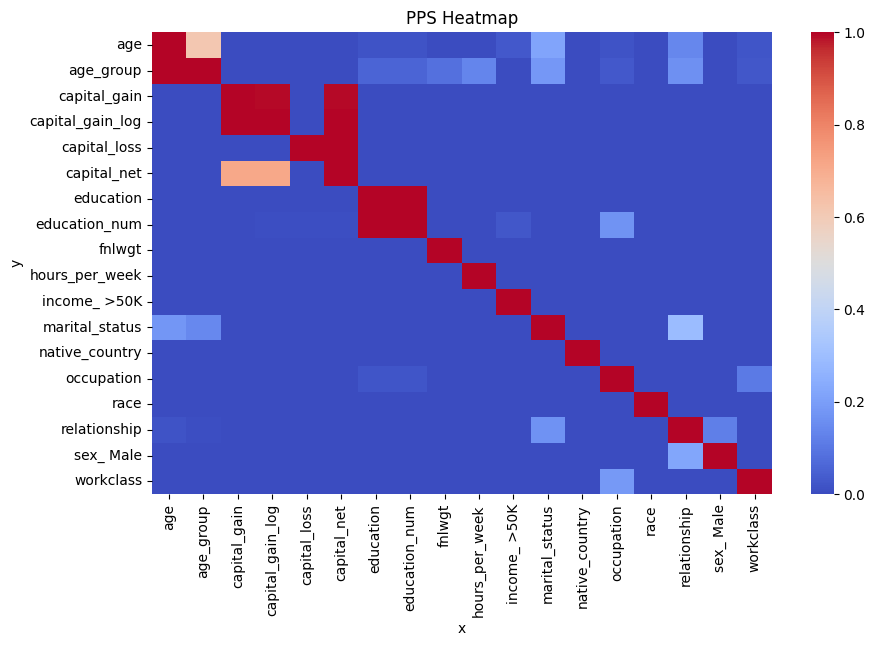

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(
    pps_matrix.pivot(columns="x", index="y", values="ppscore"),
    cmap="coolwarm"
)
plt.title("PPS Heatmap")
plt.show()


# **Compare PPS with Correlation Matrix**

/tmp/ipython-input-1706790993.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(), cmap="coolwarm")


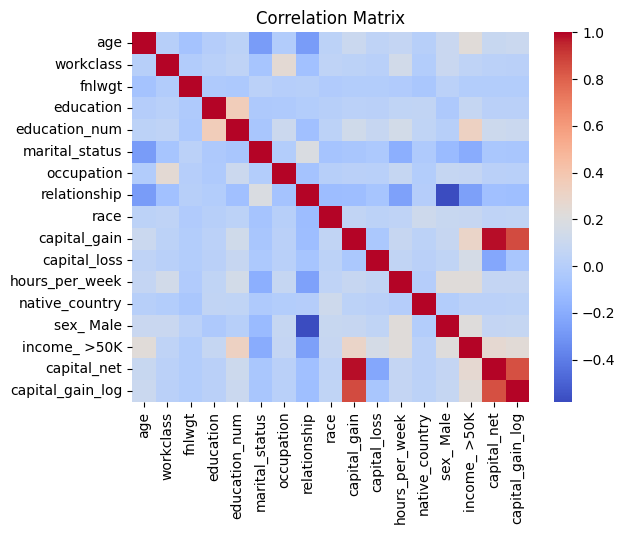

In [81]:
sns.heatmap(df_clean.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# **Differences: PPS vs Correlation**

| Metric          | Measures                              | Weakness                       | Strength                                                    |
| --------------- | ------------------------------------- | ------------------------------ | ----------------------------------------------------------- |
| **Correlation** | Linear relationship                   | Works only on numeric features | Good for simple linear dependencies                         |
| **PPS**         | Predictive power (linear + nonlinear) | Directional                    | Works on **numeric + categorical**, detects hidden patterns |


 **Isolation Forest**



*   Identified and removed outliers.
*   Outliers negatively affect model performance via noise, instability, and distorted distributions.

**PPS (Predictive Power Score)**



*  PPS matrix shows predictive relationships beyond linear patterns.
*   PPS and correlation differ because PPS captures non-linear, categorical, and directional effects.

**Correlation vs PPS**



*  Correlation is limited to linear numeric relationships.
*  PPS finds hidden predictive patterns and is much better for feature selection.


